# Stable_diffusion

> 作者: 黎颖; 龙汀汀
>
> 联系方式: yingliclaire@pku.edu.cn;   l.tingting@pku.edu.cn


Stable Diffusion 是由 Stability AI 开发的一个开源的深度学习模型，用于生成高质量图像。



使用的环境如下：

创建conda环境

```bash
conda create -n tutorial9 python=3.9
conda activate tutorial9
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
pip install numpy==1.26.4 matplotlib==3.8.4 ipykernel==6.29.5 transformers==4.42.4
pip install -U diffusers
```

注：使用的 torch 版本需要与 cuda 版本匹配，请查询 cuda 版本。

## 1. 下载模型

在联网的机器上下载模型：

```bash
export HF_ENDPOINT=https://hf-mirror.com
huggingface-cli download --token hf_*** --resume-download stabilityai/stable-diffusion-3-medium --local-dir models--stabilityai--stable-diffusion-3-medium-diffusers
```

其中 "hf_***" 是 huggingface 官网为每个用户提供的 token 序列。

如果使用 SCOW， 可以从公用存储中加载模型，存储所有模型的路径为：

/lustre/public/tutorial/models/models--stabilityai--stable-diffusion-3-medium-diffusers

从中找到本节对应的模型加载即可。

## 2. 文生图

[[参考链接]](https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers/tree/main)

运行以下代码，从文字生成图像：

In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline

# 加载模型
pipe = StableDiffusion3Pipeline.from_pretrained("models", torch_dtype=torch.float16)

# 使用 GPU
pipe = pipe.to("cuda")

# promt 内容，可以使用多个 prompt
# prompt2 = "Photorealistic"
prompt = "Albert Einstein leans forward, holds a Qing dynasty fan. A butterfly lands on the blooming peonies in the garden. The fan is positioned above the butterfly. "

# 根据 prompt 生成多张图片
for i in range(10):
    image = pipe(
            prompt=prompt,
            # prompt_2=prompt2,
            negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
            num_inference_steps=70,
            guidance_scale=7,
            height=1024,
            width=1024,
        ).images[0]

    image.save(f"{i}.png")

生成的图像在本地目录下，可点击或下载查看。


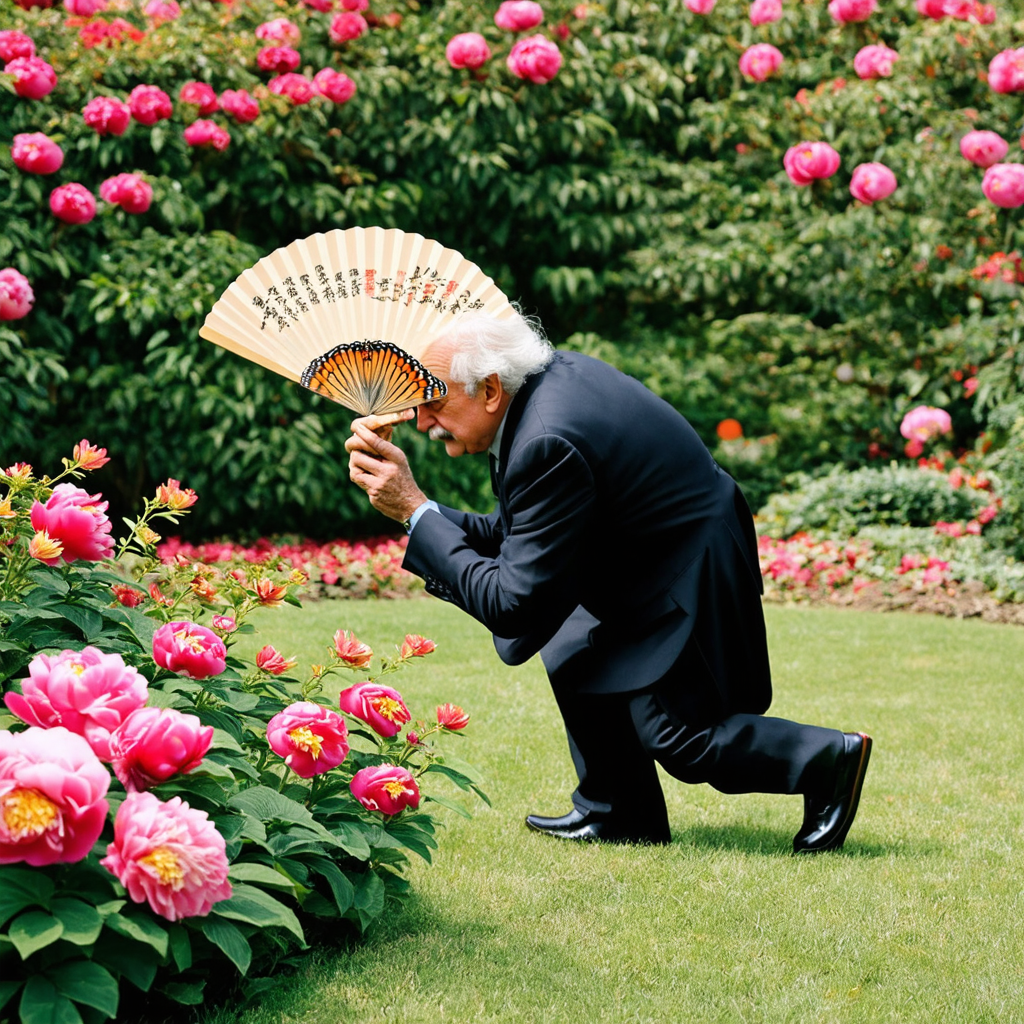